In [33]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.output {font-size:24pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:70px;}
</style>
"""))

# 1. 기본의 프로그램 방식

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 섭씨온도(인풋데이터)를 받아 화씨온도로 출력
def celsisu_to_faherenheit(c):
    return c * 1.8 + 32

In [4]:
input_c = int(input('섭씨온도는 ?'))
print('화씨온도는 ', celsisu_to_faherenheit(input_c))

섭씨온도는 ?30
화씨온도는  86.0


# 2. 머신러닝 프로그램 방식
- 1. 데이터 확보 및 생성
- 2. 데이터 전처리 : 훈련데이터셋(학습데이터셋), 검증데이터셋, 시험데이터셋,...
- 3. 모델 구성
- 4. 모델 학습과정 설정
- 5. 모델 학습시키기
- 6. 모델 평가(시험데이터셋으로)
- 7. 모델 사용(입력값을 주어지면 예측값을 받기)

## 2.1 노이즈가 없는 데이터로 실습

In [5]:
# 1. 데이터 생성
data_C = np.array(range(100)) # np.arange(100)
data_C # 독립변수

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [6]:
data_F = celsisu_to_faherenheit(data_C)
data_F # 타겟변수

array([ 32. ,  33.8,  35.6,  37.4,  39.2,  41. ,  42.8,  44.6,  46.4,
        48.2,  50. ,  51.8,  53.6,  55.4,  57.2,  59. ,  60.8,  62.6,
        64.4,  66.2,  68. ,  69.8,  71.6,  73.4,  75.2,  77. ,  78.8,
        80.6,  82.4,  84.2,  86. ,  87.8,  89.6,  91.4,  93.2,  95. ,
        96.8,  98.6, 100.4, 102.2, 104. , 105.8, 107.6, 109.4, 111.2,
       113. , 114.8, 116.6, 118.4, 120.2, 122. , 123.8, 125.6, 127.4,
       129.2, 131. , 132.8, 134.6, 136.4, 138.2, 140. , 141.8, 143.6,
       145.4, 147.2, 149. , 150.8, 152.6, 154.4, 156.2, 158. , 159.8,
       161.6, 163.4, 165.2, 167. , 168.8, 170.6, 172.4, 174.2, 176. ,
       177.8, 179.6, 181.4, 183.2, 185. , 186.8, 188.6, 190.4, 192.2,
       194. , 195.8, 197.6, 199.4, 201.2, 203. , 204.8, 206.6, 208.4,
       210.2])

In [7]:
# 3. 모델 구성
from tensorflow.keras.models import Sequential # 모델 생성
from tensorflow.keras.layers import Dense      # 입력값과 출력값

model = Sequential()
model.add(Dense(1, input_dim=1)) # input_dim=1 : 독립변수가 1개

In [8]:
# 4. 모델 학습 과정 설정
model.compile(loss="mse", optimizer="rmsprop", metrics=['mae'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
# 학습전 예측
model.predict(np.array([[0]]))

array([[0.]], dtype=float32)

In [10]:
model.save('model/before_learning.h5')

In [11]:
# 2. 데이터 전처리 : 컴퓨터에게 학습시키기 위해 normalize함(전체의 편차를 비슷하게)
#                                                   이상적인 편차 0~1
scaled_data_C = data_C / 100.0
scaled_data_F = data_F / 100.0
print('독립변수는 ', scaled_data_C)
print('타겟변수는 ', scaled_data_F)

독립변수는  [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
타겟변수는  [0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1.7

In [12]:
# 모델 학습시키기 - 1번만 실행
hist = model.fit(scaled_data_C, scaled_data_F, epochs=1000, verbose=2)
            #독립변수(훈련data)  타겟변수(훈련data)학습횟수    학습시출력여부

Epoch 1/1000
4/4 - 0s - loss: 1.4384 - mae: 1.1072
Epoch 2/1000
4/4 - 0s - loss: 1.4128 - mae: 1.0964
Epoch 3/1000
4/4 - 0s - loss: 1.3947 - mae: 1.0888
Epoch 4/1000
4/4 - 0s - loss: 1.3776 - mae: 1.0815
Epoch 5/1000
4/4 - 0s - loss: 1.3618 - mae: 1.0747
Epoch 6/1000
4/4 - 0s - loss: 1.3479 - mae: 1.0687
Epoch 7/1000
4/4 - 0s - loss: 1.3341 - mae: 1.0627
Epoch 8/1000
4/4 - 0s - loss: 1.3208 - mae: 1.0569
Epoch 9/1000
4/4 - 0s - loss: 1.3073 - mae: 1.0511
Epoch 10/1000
4/4 - 0s - loss: 1.2923 - mae: 1.0443
Epoch 11/1000
4/4 - 0s - loss: 1.2804 - mae: 1.0392
Epoch 12/1000
4/4 - 0s - loss: 1.2663 - mae: 1.0329
Epoch 13/1000
4/4 - 0s - loss: 1.2527 - mae: 1.0268
Epoch 14/1000
4/4 - 0s - loss: 1.2389 - mae: 1.0205
Epoch 15/1000
4/4 - 0s - loss: 1.2260 - mae: 1.0147
Epoch 16/1000
4/4 - 0s - loss: 1.2125 - mae: 1.0085
Epoch 17/1000
4/4 - 0s - loss: 1.2007 - mae: 1.0032
Epoch 18/1000
4/4 - 0s - loss: 1.1873 - mae: 0.9969
Epoch 19/1000
4/4 - 0s - loss: 1.1753 - mae: 0.9914
Epoch 20/1000
4/4 - 0

Epoch 158/1000
4/4 - 0s - loss: 0.1214 - mae: 0.2878
Epoch 159/1000
4/4 - 0s - loss: 0.1186 - mae: 0.2848
Epoch 160/1000
4/4 - 0s - loss: 0.1164 - mae: 0.2823
Epoch 161/1000
4/4 - 0s - loss: 0.1136 - mae: 0.2793
Epoch 162/1000
4/4 - 0s - loss: 0.1116 - mae: 0.2773
Epoch 163/1000
4/4 - 0s - loss: 0.1094 - mae: 0.2748
Epoch 164/1000
4/4 - 0s - loss: 0.1073 - mae: 0.2724
Epoch 165/1000
4/4 - 0s - loss: 0.1046 - mae: 0.2694
Epoch 166/1000
4/4 - 0s - loss: 0.1026 - mae: 0.2670
Epoch 167/1000
4/4 - 0s - loss: 0.1003 - mae: 0.2646
Epoch 168/1000
4/4 - 0s - loss: 0.0979 - mae: 0.2619
Epoch 169/1000
4/4 - 0s - loss: 0.0958 - mae: 0.2594
Epoch 170/1000
4/4 - 0s - loss: 0.0937 - mae: 0.2569
Epoch 171/1000
4/4 - 0s - loss: 0.0916 - mae: 0.2544
Epoch 172/1000
4/4 - 0s - loss: 0.0898 - mae: 0.2522
Epoch 173/1000
4/4 - 0s - loss: 0.0879 - mae: 0.2501
Epoch 174/1000
4/4 - 0s - loss: 0.0862 - mae: 0.2480
Epoch 175/1000
4/4 - 0s - loss: 0.0842 - mae: 0.2455
Epoch 176/1000
4/4 - 0s - loss: 0.0827 - mae: 

Epoch 313/1000
4/4 - 0s - loss: 0.0188 - mae: 0.1186
Epoch 314/1000
4/4 - 0s - loss: 0.0186 - mae: 0.1177
Epoch 315/1000
4/4 - 0s - loss: 0.0183 - mae: 0.1168
Epoch 316/1000
4/4 - 0s - loss: 0.0180 - mae: 0.1160
Epoch 317/1000
4/4 - 0s - loss: 0.0177 - mae: 0.1152
Epoch 318/1000
4/4 - 0s - loss: 0.0175 - mae: 0.1142
Epoch 319/1000
4/4 - 0s - loss: 0.0172 - mae: 0.1132
Epoch 320/1000
4/4 - 0s - loss: 0.0170 - mae: 0.1124
Epoch 321/1000
4/4 - 0s - loss: 0.0167 - mae: 0.1116
Epoch 322/1000
4/4 - 0s - loss: 0.0164 - mae: 0.1108
Epoch 323/1000
4/4 - 0s - loss: 0.0162 - mae: 0.1100
Epoch 324/1000
4/4 - 0s - loss: 0.0160 - mae: 0.1092
Epoch 325/1000
4/4 - 0s - loss: 0.0157 - mae: 0.1082
Epoch 326/1000
4/4 - 0s - loss: 0.0155 - mae: 0.1076
Epoch 327/1000
4/4 - 0s - loss: 0.0153 - mae: 0.1069
Epoch 328/1000
4/4 - 0s - loss: 0.0151 - mae: 0.1061
Epoch 329/1000
4/4 - 0s - loss: 0.0149 - mae: 0.1053
Epoch 330/1000
4/4 - 0s - loss: 0.0147 - mae: 0.1046
Epoch 331/1000
4/4 - 0s - loss: 0.0144 - mae: 

Epoch 465/1000
4/4 - 0s - loss: 5.3073e-06 - mae: 0.0019
Epoch 466/1000
4/4 - 0s - loss: 2.8091e-06 - mae: 0.0014
Epoch 467/1000
4/4 - 0s - loss: 2.0541e-06 - mae: 0.0012
Epoch 468/1000
4/4 - 0s - loss: 9.7344e-07 - mae: 7.8911e-04
Epoch 469/1000
4/4 - 0s - loss: 6.7021e-07 - mae: 6.8865e-04
Epoch 470/1000
4/4 - 0s - loss: 6.9825e-07 - mae: 6.8991e-04
Epoch 471/1000
4/4 - 0s - loss: 1.2358e-07 - mae: 2.9856e-04
Epoch 472/1000
4/4 - 0s - loss: 2.1426e-07 - mae: 4.2225e-04
Epoch 473/1000
4/4 - 0s - loss: 1.3480e-06 - mae: 0.0011
Epoch 474/1000
4/4 - 0s - loss: 1.1951e-07 - mae: 3.3861e-04
Epoch 475/1000
4/4 - 0s - loss: 2.6056e-07 - mae: 4.8300e-04
Epoch 476/1000
4/4 - 0s - loss: 1.2363e-06 - mae: 0.0011
Epoch 477/1000
4/4 - 0s - loss: 3.7844e-07 - mae: 6.0179e-04
Epoch 478/1000
4/4 - 0s - loss: 5.4296e-07 - mae: 7.2109e-04
Epoch 479/1000
4/4 - 0s - loss: 2.0766e-07 - mae: 4.3945e-04
Epoch 480/1000
4/4 - 0s - loss: 9.9531e-07 - mae: 9.7865e-04
Epoch 481/1000
4/4 - 0s - loss: 1.1964e-06 -

Epoch 601/1000
4/4 - 0s - loss: 1.6315e-06 - mae: 0.0012
Epoch 602/1000
4/4 - 0s - loss: 3.2039e-07 - mae: 5.4442e-04
Epoch 603/1000
4/4 - 0s - loss: 1.6484e-07 - mae: 3.9711e-04
Epoch 604/1000
4/4 - 0s - loss: 9.6940e-07 - mae: 9.5846e-04
Epoch 605/1000
4/4 - 0s - loss: 5.3631e-07 - mae: 7.1577e-04
Epoch 606/1000
4/4 - 0s - loss: 4.1847e-07 - mae: 6.2964e-04
Epoch 607/1000
4/4 - 0s - loss: 7.9807e-07 - mae: 8.7395e-04
Epoch 608/1000
4/4 - 0s - loss: 6.8329e-07 - mae: 8.0683e-04
Epoch 609/1000
4/4 - 0s - loss: 3.5560e-07 - mae: 5.8191e-04
Epoch 610/1000
4/4 - 0s - loss: 7.7524e-07 - mae: 8.6262e-04
Epoch 611/1000
4/4 - 0s - loss: 3.6939e-07 - mae: 5.9770e-04
Epoch 612/1000
4/4 - 0s - loss: 7.4552e-07 - mae: 8.4536e-04
Epoch 613/1000
4/4 - 0s - loss: 6.4207e-07 - mae: 7.8404e-04
Epoch 614/1000
4/4 - 0s - loss: 5.0363e-07 - mae: 6.9596e-04
Epoch 615/1000
4/4 - 0s - loss: 4.4776e-07 - mae: 6.5035e-04
Epoch 616/1000
4/4 - 0s - loss: 7.6475e-07 - mae: 8.4854e-04
Epoch 617/1000
4/4 - 0s - lo

Epoch 737/1000
4/4 - 0s - loss: 1.2564e-06 - mae: 0.0011
Epoch 738/1000
4/4 - 0s - loss: 1.4949e-07 - mae: 3.6494e-04
Epoch 739/1000
4/4 - 0s - loss: 3.4850e-07 - mae: 5.6686e-04
Epoch 740/1000
4/4 - 0s - loss: 1.0993e-06 - mae: 0.0010
Epoch 741/1000
4/4 - 0s - loss: 1.7816e-07 - mae: 4.1023e-04
Epoch 742/1000
4/4 - 0s - loss: 1.0711e-07 - mae: 2.9850e-04
Epoch 743/1000
4/4 - 0s - loss: 1.4299e-06 - mae: 0.0012
Epoch 744/1000
4/4 - 0s - loss: 5.1067e-07 - mae: 6.9683e-04
Epoch 745/1000
4/4 - 0s - loss: 6.9104e-09 - mae: 7.0949e-05
Epoch 746/1000
4/4 - 0s - loss: 1.6511e-09 - mae: 3.3509e-05
Epoch 747/1000
4/4 - 0s - loss: 1.9489e-09 - mae: 3.4648e-05
Epoch 748/1000
4/4 - 0s - loss: 1.7292e-06 - mae: 0.0011
Epoch 749/1000
4/4 - 0s - loss: 1.1129e-06 - mae: 8.2465e-04
Epoch 750/1000
4/4 - 0s - loss: 3.8884e-09 - mae: 4.9413e-05
Epoch 751/1000
4/4 - 0s - loss: 1.1370e-09 - mae: 2.7244e-05
Epoch 752/1000
4/4 - 0s - loss: 1.0725e-09 - mae: 2.7966e-05
Epoch 753/1000
4/4 - 0s - loss: 3.3519e-

Epoch 873/1000
4/4 - 0s - loss: 8.2401e-07 - mae: 8.7948e-04
Epoch 874/1000
4/4 - 0s - loss: 7.6974e-07 - mae: 8.4526e-04
Epoch 875/1000
4/4 - 0s - loss: 6.6777e-08 - mae: 2.5402e-04
Epoch 876/1000
4/4 - 0s - loss: 1.3320e-07 - mae: 3.3333e-04
Epoch 877/1000
4/4 - 0s - loss: 1.2181e-06 - mae: 0.0011
Epoch 878/1000
4/4 - 0s - loss: 1.0095e-06 - mae: 9.2490e-04
Epoch 879/1000
4/4 - 0s - loss: 5.7646e-08 - mae: 2.3222e-04
Epoch 880/1000
4/4 - 0s - loss: 1.1628e-07 - mae: 3.2764e-04
Epoch 881/1000
4/4 - 0s - loss: 1.3373e-06 - mae: 0.0011
Epoch 882/1000
4/4 - 0s - loss: 3.4322e-07 - mae: 5.5378e-04
Epoch 883/1000
4/4 - 0s - loss: 3.6847e-07 - mae: 5.8617e-04
Epoch 884/1000
4/4 - 0s - loss: 7.4426e-07 - mae: 8.4488e-04
Epoch 885/1000
4/4 - 0s - loss: 8.9932e-07 - mae: 9.0510e-04
Epoch 886/1000
4/4 - 0s - loss: 1.5499e-07 - mae: 3.7350e-04
Epoch 887/1000
4/4 - 0s - loss: 5.4159e-07 - mae: 7.1064e-04
Epoch 888/1000
4/4 - 0s - loss: 6.8751e-07 - mae: 8.0802e-04
Epoch 889/1000
4/4 - 0s - loss: 

In [14]:
hist.history.keys()

dict_keys(['loss', 'mae'])

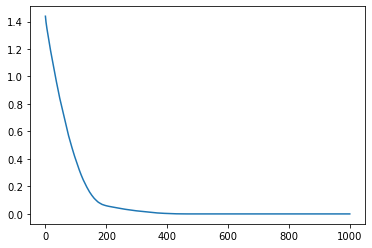

In [15]:
plt.plot(hist.history['loss'])
plt.show()

In [17]:
model.predict(np.array([0]))
model.predict([0])

array([[0.3194474]], dtype=float32)

In [18]:
model.predict(np.array([0.01]))

array([[0.33744422]], dtype=float32)

In [19]:
model.save('model/after_learning.h5')

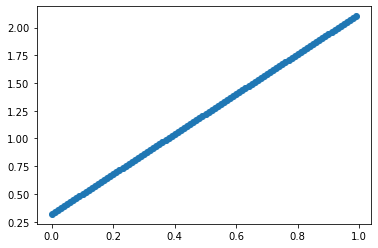

In [20]:
plt.scatter(x=scaled_data_C, y=scaled_data_F)

## 1.3 노이즈가 있는 데이터로 실습

In [24]:
# 평균이 0이고 표준편차가 0.1인 데이터 100
np.random.seed(707)
noise = np.array(np.random.normal(0, 0.1, 100))
noised_scaled_data_F = noise + scaled_data_F

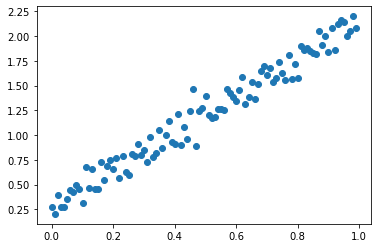

In [25]:
plt.scatter(x=scaled_data_C, y=noised_scaled_data_F)
plt.show()

In [26]:
# 3. 모델 구성
model2 = Sequential()
model2.add(Dense(1, input_dim=1))
# 4. 학습과정 설정
model2.compile(loss='mse', optimizer="rmsprop", metrics=['mae'])
               # 손실함수           옵티마이저           평가지표
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
# 5. 학습시키기
hist2 = model2.fit(scaled_data_C, noised_scaled_data_F, epochs=1000, verbose=2)

Epoch 1/1000
4/4 - 0s - loss: 0.1463 - mae: 0.3644
Epoch 2/1000
4/4 - 0s - loss: 0.1384 - mae: 0.3537
Epoch 3/1000
4/4 - 0s - loss: 0.1326 - mae: 0.3455
Epoch 4/1000
4/4 - 0s - loss: 0.1277 - mae: 0.3387
Epoch 5/1000
4/4 - 0s - loss: 0.1233 - mae: 0.3323
Epoch 6/1000
4/4 - 0s - loss: 0.1187 - mae: 0.3255
Epoch 7/1000
4/4 - 0s - loss: 0.1147 - mae: 0.3193
Epoch 8/1000
4/4 - 0s - loss: 0.1108 - mae: 0.3133
Epoch 9/1000
4/4 - 0s - loss: 0.1075 - mae: 0.3082
Epoch 10/1000
4/4 - 0s - loss: 0.1039 - mae: 0.3025
Epoch 11/1000
4/4 - 0s - loss: 0.1005 - mae: 0.2968
Epoch 12/1000
4/4 - 0s - loss: 0.0970 - mae: 0.2910
Epoch 13/1000
4/4 - 0s - loss: 0.0935 - mae: 0.2851
Epoch 14/1000
4/4 - 0s - loss: 0.0904 - mae: 0.2797
Epoch 15/1000
4/4 - 0s - loss: 0.0872 - mae: 0.2741
Epoch 16/1000
4/4 - 0s - loss: 0.0840 - mae: 0.2684
Epoch 17/1000
4/4 - 0s - loss: 0.0809 - mae: 0.2627
Epoch 18/1000
4/4 - 0s - loss: 0.0778 - mae: 0.2569
Epoch 19/1000
4/4 - 0s - loss: 0.0750 - mae: 0.2517
Epoch 20/1000
4/4 - 0

Epoch 158/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 159/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 160/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 161/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 162/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 163/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880
Epoch 164/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 165/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880
Epoch 166/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880
Epoch 167/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880
Epoch 168/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0881
Epoch 169/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 170/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 171/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880
Epoch 172/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880
Epoch 173/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 174/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 175/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 176/1000
4/4 - 0s - loss: 0.0110 - mae: 

Epoch 313/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 314/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 315/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 316/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 317/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877
Epoch 318/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 319/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877
Epoch 320/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 321/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880
Epoch 322/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880
Epoch 323/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 324/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 325/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 326/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880
Epoch 327/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880
Epoch 328/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877
Epoch 329/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 330/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 331/1000
4/4 - 0s - loss: 0.0109 - mae: 

Epoch 468/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 469/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 470/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 471/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 472/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 473/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877
Epoch 474/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 475/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 476/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 477/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 478/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 479/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 480/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 481/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 482/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 483/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 484/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 485/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 486/1000
4/4 - 0s - loss: 0.0110 - mae: 

Epoch 623/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 624/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 625/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 626/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 627/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 628/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 629/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 630/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 631/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 632/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 633/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 634/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 635/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880
Epoch 636/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880
Epoch 637/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 638/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 639/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 640/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880
Epoch 641/1000
4/4 - 0s - loss: 0.0110 - mae: 

Epoch 778/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877
Epoch 779/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 780/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877
Epoch 781/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 782/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 783/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 784/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 785/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 786/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 787/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 788/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 789/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 790/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 791/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 792/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877
Epoch 793/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 794/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 795/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 796/1000
4/4 - 0s - loss: 0.0110 - mae: 

Epoch 933/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 934/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 935/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 936/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 937/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 938/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 939/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877
Epoch 940/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877
Epoch 941/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0876
Epoch 942/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 943/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877
Epoch 944/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877
Epoch 945/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 946/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 947/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 948/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 949/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 950/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 951/1000
4/4 - 0s - loss: 0.0110 - mae: 

In [30]:
model2.predict(np.array([0.01]))

array([[0.30074206]], dtype=float32)

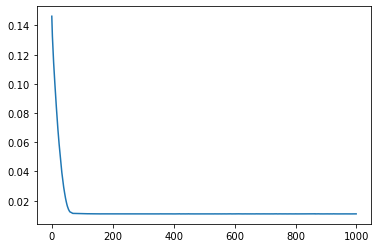

In [31]:
plt.plot(hist2.history['loss'])

In [32]:
model2.save('model/noise_after_learning.h5')